In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

#Helps to ignore warnings directly while executing the code and displays output directly
warnings.filterwarnings("ignore")

#Helps to display the visualizations directly in the notebook as output instead pf displaying in separate window
%matplotlib inline

In [17]:
# Load the data
data = pd.read_csv('Downloads/wSW4Bvy1YFd47nT4GSTe6q/Topmate_Data_Analytics_Bootcamp/Linkedin Jobs Data Analysis using Python/Dataset/LinkedIn_Jobs_Data_India.csv')

In [20]:
# Show top 5 records
data.head(5)

,Unnamed: 0,id,publishedAt,title,companyName,postedTime,applicationsCount,description,contractType,experienceLevel,workType,sector,companyId,city,state,recently_posted_jobs
0,0,3800928381,2024-01-09,Front-end Engineer/Web Developer (SDE 1 &amp; 2),BOX8,3 weeks ago,85.0,"Skill: html5 , ajax , oop , git , postgresql ,...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No
1,1,3800929078,2024-01-09,Android Developer-SDE 1 &amp; 2(Software Devel...,BOX8,3 weeks ago,80.0,"Skill: algorithms , rest , github , css , html...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No
2,2,3792399495,2023-12-27,Web Developer,Mahe Technologies Private Limited,1 month ago,75.0,The ideal candidate is a creative problem solv...,Full-time,Executive,Engineering and Information Technology,Information Technology & Services,14387125,Greater Kolkata Area,NaN,No
3,3,3792604197,2023-12-27,Web Developer,Mahe Technologies Private Limited,1 month ago,52.0,The ideal candidate is a creative problem solv...,Full-time,Executive,Engineering and Information Technology,Information Technology & Services,14387125,Greater Kolkata Area,NaN,No
4,4,3808399427,2024-01-23,Software Engineer,Microsoft,1 week ago,26.0,Do you have a passion for security? Do you lik...,Full-time,Not Applicable,Engineering and Information Technology,Software Development,1035,Hyderabad,Telangana,Yes


In [22]:
# Shape of the dataset
data.shape

(949, 16)

##### GET SOME BASIC INFORMATION ABOUT THE DATASET #####

In [25]:
# Prints a concise summary of DataFrame 'data', including data types, non-null values and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            949 non-null    int64  
 1   id                    949 non-null    int64  
 2   publishedAt           857 non-null    object 
 3   title                 949 non-null    object 
 4   companyName           949 non-null    object 
 5   postedTime            949 non-null    object 
 6   applicationsCount     949 non-null    float64
 7   description           949 non-null    object 
 8   contractType          860 non-null    object 
 9   experienceLevel       949 non-null    object 
 10  workType              860 non-null    object 
 11  sector                860 non-null    object 
 12  companyId             949 non-null    int64  
 13  city                  949 non-null    object 
 14  state                 871 non-null    object 
 15  recently_posted_jobs  9

In [27]:
# Returns data types of each column in a dataset
data.dtypes

Unnamed: 0                int64
id                        int64
publishedAt              object
title                    object
companyName              object
postedTime               object
applicationsCount       float64
description              object
contractType             object
experienceLevel          object
workType                 object
sector                   object
companyId                 int64
city                     object
state                    object
recently_posted_jobs     object
dtype: object

##### ARE THERE ANY DUPLICATES IN THE DATASET, IF YES REMOVE ALL THE DUPLICATE RECORDS #####

In [30]:
# Returns the count of duplicate records in the dataset
data.duplicated().sum()

0

###### Q1. IS THERE ANY NULL VALUES PRESENT IN THE COLUMNS OF DATASET ? ######

In [33]:
# Returns count of null values for each column of dataset
data.isnull().sum()

Unnamed: 0               0
id                       0
publishedAt             92
title                    0
companyName              0
postedTime               0
applicationsCount        0
description              0
contractType            89
experienceLevel          0
workType                89
sector                  89
companyId                0
city                     0
state                   78
recently_posted_jobs     0
dtype: int64

###### Q2. WHICH COMPANIES ARE MOST ACTIVE IN POSTING JOB OPENINGS ON LINKEDIN ? ######

In [36]:
# Group the data by company name and count the no. of job postings
company_jobs_list = data.groupby('companyName').size().reset_index(name = 'job_count')

# Sort the companies by the number of job postings in descending order
active_companies = company_jobs_list.sort_values(by='job_count', ascending=False)

# Display the top 10 most active companies
active_companies.head(10)

,companyName,job_count
487,Tata Cummins,20
179,Freshworks,17
203,Google,12
134,"Dubai Jobs, Gulf Jobs, Jobs in Dubai, Qatar, K...",11
21,Aditya Birla Capital,11
252,Infosys,10
489,Tata Technologies,10
335,Microsoft,10
292,LTIMindtree,9
546,Valeo,9


###### Q3. WHICH SECTORS ARE CURRENTLY IN HIGH DEMAND FOR HIRING ? ######

In [39]:
# Group the data by sector and count the no. of job postings
sector_jobs_list = data.groupby('sector').size().reset_index(name = 'job_count')

# Sort the sectors by the no. of job postings in descending order
most_in_demand_sectors = sector_jobs_list.sort_values(by='job_count', ascending=False)

# Display the top 10 most in-demand sectors
most_in_demand_sectors.head(10)

,sector,job_count
97,IT Services and IT Consulting,85
191,Software Development,74
203,Staffing and Recruiting,47
72,Financial Services,42
206,"Technology, Information and Internet",42
9,"Appliances, Electrical, and Electronics Manufa...",28
141,Manufacturing,19
130,Information Technology & Services,19
96,Human Resources Services,19
58,Consumer Services,16


###### Q4. WHAT ARE THE MOST COMMON CONTRACT TYPES FOR JOB POSTINGS ? ######

In [42]:
# Count the occurences of each contract type
contract_type_count = data['contractType'].value_counts()
contract_type_count

contractType
Full-time     831
Internship     13
Contract       11
Part-time       3
Temporary       1
Other           1
Name: count, dtype: int64

###### Q5. WHAT IS THE AVERAGE NUMBER OF APPLICATIONS PER JOB POSTING ? ######

In [45]:
# Calculate the average no.of applications per job posting
avg_applications_per_job = data['applicationsCount'].mean()

# Print the count of no. of applications per job posting
print("Average no. pf applications per job posting:", avg_applications_per_job)

Average no. pf applications per job posting: 116.99789251844047


###### Q6. WHICH CITIES HAVE THE HIGHEST NUMBER OF JOB POSTINGS ? ######

In [48]:
# Count the job postings for each city
city_highest_jobs = data['city'].value_counts().reset_index(name = 'jobs_count')

# Print the no. of job postings for top 10 cities
print(city_highest_jobs.head(10))

        city  jobs_count
0  Bengaluru         196
1     Mumbai         123
2   Gurugram          67
3       Pune          62
4  Hyderabad          54
5    Chennai          42
6      Noida          31
7      India          30
8    Gurgaon          25
9      Delhi          24


###### Q7. WHAT IS THE MOST COMMON LEVEL OF EXPERIENCE REQUIRED FOR JOB POSTINGS ? ######

In [51]:
# Count the occurences of each experience level
experience_level_counts = data['experienceLevel'].value_counts()

# Find out the most common level of experience value from the above list of experience values
most_common_experience_level = experience_level_counts.idxmax()

print("The most common level of experience required for job postings is:", most_common_experience_level)

The most common level of experience required for job postings is: Mid-Senior level


###### Q8. WHAT ARE THE AVERAGE NO. OF JOB APPLICATIONS RECIEVED PER SECTOR ? ######

In [54]:
# Group by sector and find the average applicatins per sector
avg_applications_per_sector = data.groupby('sector')['applicationsCount'].mean()

print(avg_applications_per_sector)

sector
Accounting                                                                                                                        112.5000
Administrative and Support Services                                                                                                25.0000
Advertising Services                                                                                                               88.6875
Advertising Services and Marketing Services                                                                                       200.0000
Advertising Services, Broadcast Media Production and Distribution, and Technology, Information and Media                          200.0000
                                                                                                                                    ...   
Wellness and Fitness Services                                                                                                      34.5000
Wholesale Building M

###### Q9. WHICH CITIES HAVE THE HIGHEST NUMBER OF JOB POSTINGS FOR ENTRY-LEVEL POSITIONS(ExperienceLevel=Entry-Level) IN THE STAFFING AND RECRUITING SECTOR ? ######

In [75]:
# Filter job postings for entry-level positions in the 'Staffing and Recruiting' sector or the 'Finance' sector

filtered_df = data[(data['experienceLevel'] == 'Entry level') & ((data['sector'] == 'Staffing and Recruiting') )]

In [77]:
# Group by city and count the number of job postings in each city
city_job_counts = filtered_df['city'].value_counts()
city_job_counts

city
Bengaluru          5
Chennai            3
Pune               2
Navi Mumbai        2
Bangalore Urban    2
Mumbai             2
Thane              2
Gurugram           2
Delhi              1
Halol              1
Hooghly            1
Rajkot             1
Bhilwara           1
Bulandshahr        1
Ahmedabad          1
Hyderabad          1
Nashik             1
Ramanagar          1
Name: count, dtype: int64

In [79]:
# Check the top 2 job posting records for entry level position
data.head(2)

,Unnamed: 0,id,publishedAt,title,companyName,postedTime,applicationsCount,description,contractType,experienceLevel,workType,sector,companyId,city,state,recently_posted_jobs
0,0,3800928381,2024-01-09,Front-end Engineer/Web Developer (SDE 1 &amp; 2),BOX8,3 weeks ago,85.0,"Skill: html5 , ajax , oop , git , postgresql ,...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No
1,1,3800929078,2024-01-09,Android Developer-SDE 1 &amp; 2(Software Devel...,BOX8,3 weeks ago,80.0,"Skill: algorithms , rest , github , css , html...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No


###### Q10. WHAT IS THE AVERAGE NO. OF APPLICATIONS RECIEVED FOR JOB POSTINGS REQUIRING ENTRY LEVEL OF EXPERIENCE IN THE 'IT SERVICES AND IT CONSULTING'SECTOR OR 'STAFFING AND RECRUITING'SECTOR ? ######

In [82]:
filtered_df = data[((data['experienceLevel'] == 'Entry Level') & (data['sector'] == 'IT Services and IT Consulting') | (data['sector'] == 'Staffing and Recruiting'))]
filtered_df

,Unnamed: 0,id,publishedAt,title,companyName,postedTime,applicationsCount,description,contractType,experienceLevel,workType,sector,companyId,city,state,recently_posted_jobs
0,0,3800928381,2024-01-09,Front-end Engineer/Web Developer (SDE 1 &amp; 2),BOX8,3 weeks ago,85.0,"Skill: html5 , ajax , oop , git , postgresql ,...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No
1,1,3800929078,2024-01-09,Android Developer-SDE 1 &amp; 2(Software Devel...,BOX8,3 weeks ago,80.0,"Skill: algorithms , rest , github , css , html...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No
31,32,3800919967,2024-01-09,Web / UI Developer (HTML5 / CSS3 / JavaScript),OptiRisk India,3 weeks ago,123.0,"Skill: html5 , ajax , xml , json , debugging ,...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,840297,Chennai,Tamil Nadu,No
45,46,3800928532,2024-01-09,Web Developer,Sumago Infotech Pvt. Ltd.,3 weeks ago,92.0,"Skill: css , html5 , web developer , php , boo...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,76330124,Nashik,Maharashtra,No
66,67,3809891549,2024-01-20,Web DevelopeR - pune,"DC Consultants(India,USA,Australia,GCC)",2 weeks ago,25.0,"Job Description\n\n\n * Write well designed, t...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,13460710,Pune,Maharashtra,No
73,74,3812590585,2024-01-25,Software Developer,Cytrion Software Solutions Pvt Ltd,1 week ago,26.0,"Skill: c# , security , java , php , .net , sof...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,2610375,Hyderabad,Telangana,Yes
74,75,3792392088,2023-12-27,Web Developer,Careernet,1 month ago,84.0,Job : Technology\n\nPrimary Location : Asia-In...,Full-time,Associate,Engineering and Information Technology,Staffing and Recruiting,162898,Chennai,Tamil Nadu,No
75,76,3792392967,2023-12-27,React JS Developer- Software Engineer,Hashone Careers,1 month ago,37.0,Software Engineer-React JS Developer\n\nRespon...,Full-time,Associate,Engineering and Information Technology,Staffing and Recruiting,75644564,Bengaluru,Karnataka,No
77,78,3800921273,2024-01-09,Web Developer,Raga Designers,3 weeks ago,144.0,"Skill: css , authoring , team player , javascr...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3964747,Chennai,Tamil Nadu,No
91,92,3800924011,2024-01-09,Upstox - Software Development Engineer - II/II...,Upstox,3 weeks ago,29.0,"Skill: javascript\n\n, html\n\n, css\n\n, reac...",Full-time,Mid-Senior level,Engineering and Information Technology,Staffing and Recruiting,15091079,Mumbai,Maharashtra,No


###### Q11. WHICH COMPANIES HAVE HIGHEST NO. OF JOB POSTINGS FOR FULL-TIME POSITIONS IN THE 'SOFTWARE DEVELOPMENT'SECTOR AND 'FINANCIAL SERVICES' ? ######

In [97]:
# Filter job postings for full-time positions in the 'Software Development' sector and the 'Financial Services' sector

filtered_df = data[((data['contractType'] == 'Full-time') | (data['contractType'] == 'Permanent')) & ((data['sector'] == 'Software Development') | (data['sector'] == 'Financial Services'))]
filtered_df

,Unnamed: 0,id,publishedAt,title,companyName,postedTime,applicationsCount,description,contractType,experienceLevel,workType,sector,companyId,city,state,recently_posted_jobs
4,4,3808399427,2024-01-23,Software Engineer,Microsoft,1 week ago,26.0,Do you have a passion for security? Do you lik...,Full-time,Not Applicable,Engineering and Information Technology,Software Development,1035,Hyderabad,Telangana,Yes
5,5,3803684281,2024-01-17,Software Engineer,Microsoft,2 weeks ago,200.0,Microsoft Endpoint Manager (MEM) Is An Integra...,Full-time,Not Applicable,Engineering and Information Technology,Software Development,1035,Noida,Uttar Pradesh,No
21,21,3808000044,2024-01-22,Software Engineer,Microsoft,1 week ago,120.0,Security represents the most critical prioriti...,Full-time,Not Applicable,Engineering and Information Technology,Software Development,1035,Hyderabad,Telangana,Yes
22,22,3807487394,2024-01-22,Software Engineer,Intuit,1 week ago,139.0,Overview:\n\n\n\nCome join the ProConnect team...,Full-time,Mid-Senior level,Engineering and Information Technology,Software Development,1666,Bengaluru,Karnataka,Yes
24,24,3800587016,2024-01-12,Software Engineer Test,PhonePe,3 weeks ago,200.0,About PhonePe\n\nPhonePe is India’s leading di...,Full-time,Mid-Senior level,Engineering and Information Technology,Software Development,10479149,Bangalore Urban,Karnataka,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,870,3813504011,2024-01-25,Editor (Content Writer) - Mumbai,Nielsen,1 week ago,29.0,"At Nielsen, we believe that career growth is a...",Full-time,Not Applicable,"Marketing, Public Relations, and Writing/Editing",Software Development,1714,Mumbai,Maharashtra,Yes
798,886,3787871655,2024-01-03,Content Writer,Livspace,1 month ago,200.0,ABOUT US\n\n\n\n\nLivspace is Asiaʼs largest a...,Full-time,Associate,"Design, Art/Creative, and Marketing",Software Development,2963287,Bangalore Urban,Karnataka,No
804,892,3802065898,2024-01-15,Finance Copywriter,Groww,2 weeks ago,52.0,About Groww\n\n\n\n\nWe are a passionate group...,Full-time,Associate,"Writing/Editing, Marketing, and Finance",Financial Services,10813156,Bengaluru,Karnataka,No
822,911,3769027853,2024-01-12,Copywriter,INDmoney,3 weeks ago,67.0,"As a Copywriter, you will be involved in creat...",Full-time,Mid-Senior level,Marketing,Financial Services,14406593,Gurugram,Haryana,No


In [99]:
# Group by company names and count the number of job postings in each company
company_job_counts = filtered_df['companyName'].value_counts()

In [101]:
# Display the list of companies for full-time job postings for specified sectors
print(company_job_counts.head(10))

companyName
Freshworks                       17
Aditya Birla Capital             11
Microsoft                        10
Eazy ERP Technologies Pvt Ltd     6
Navi                              3
ValGenesis                        3
Antal International               2
Intuit                            2
Redrob by McKinley Rice           2
MakeMyTrip                        2
Name: count, dtype: int64


###### Q12. HOW DOES THE NUMBER OF APPLICATIONS VARY ACROSS DIFFERENT EXPERIENCE LEVELS ? ######

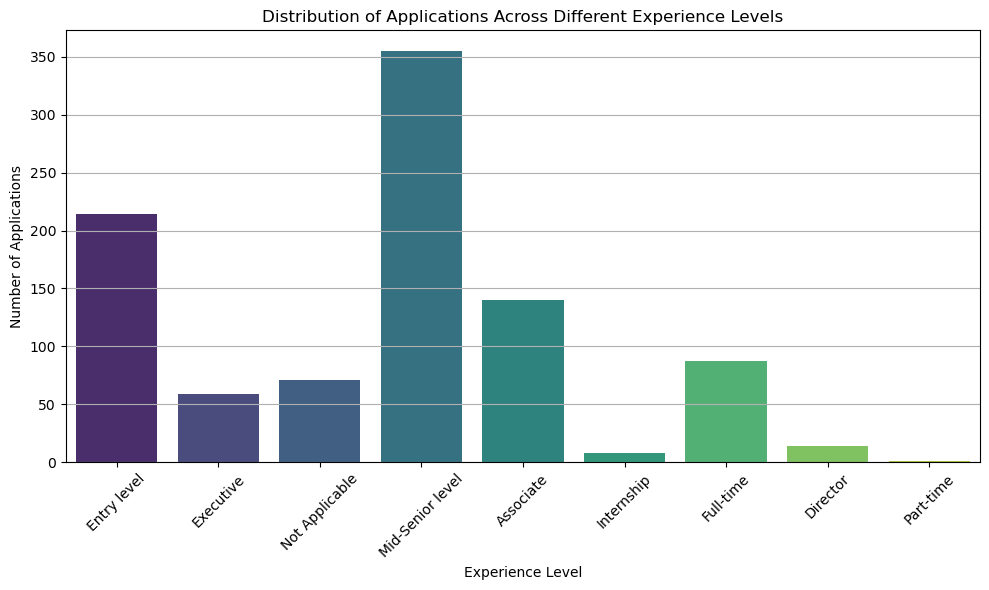

In [118]:
# Create a count plot to visualize the distribution of applications across different experience levels
plt.figure(figsize=(10, 6))
sns.countplot(x='experienceLevel', data=data, palette='viridis')
plt.title('Distribution of Applications Across Different Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines on y-axis
plt.tight_layout()
plt.show()

##### Insights
- **Mid-Senior level positions attract the most applications**, with a significantly higher number compared to other levels.
- **Entry-level and Associate positions** also receive a relatively high number of applications.
- **Not Applicable, Executive, Internship, Full-time, Director, and Part-time positions** receive significantly fewer applications.

###### Q13. WHAT IS THE DISTRIBUTION OF JOB POSTINGS BY CONTRACT TYPE AND EXPERIENCE LEVEL ? ######

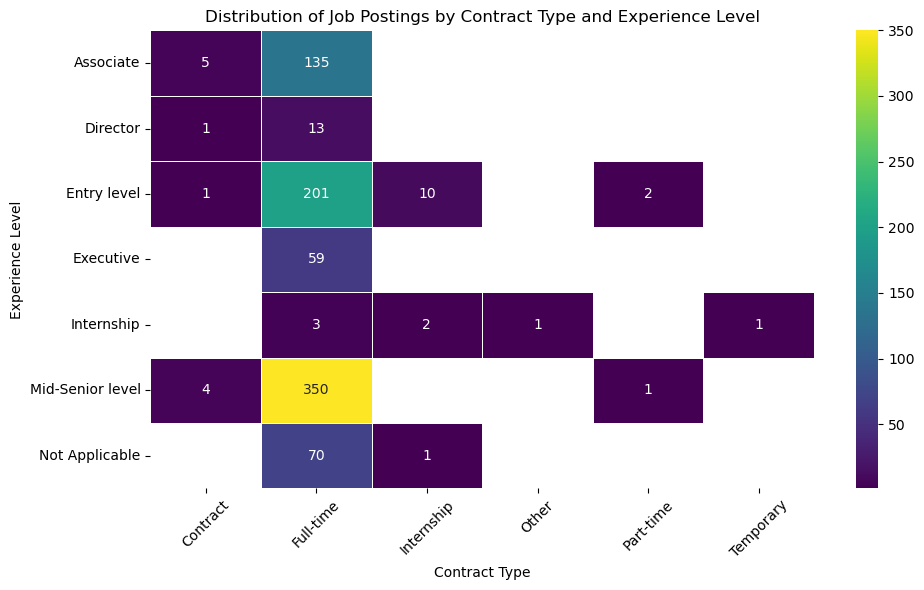

In [122]:
# Create a pivot table to aggregate the count of job postings by contract type and experience level
pivot_df = data.pivot_table(index='experienceLevel', columns='contractType', values='title', aggfunc='count')

# Create a heatmap to visualize the distribution of job postings by contract type and experience level
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, cmap='viridis', annot=True, fmt='g', linewidths=0.5)
plt.title('Distribution of Job Postings by Contract Type and Experience Level')
plt.xlabel('Contract Type')
plt.ylabel('Experience Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.tight_layout()
plt.show()

##### Insights
- The graphs shows a heatmap representing the distribution of job postings by contract type and experience level. The x-axis lists different contract types (Contract, Full-time, Internship, Other, Part-time, Temporary), while the y-axis represents various experience levels (Associate, Director, Entry level, Executive, Internship, Mid-Senior level, Not Applicable).

- The color intensity of each cell indicates the number of job postings for a particular combination of contract type and experience level. A darker color represents a higher number of job postings, while a lighter color indicates a lower number.

###### Q14. COUNT OF JOB POSTINGS FOR EACH CONTRACT TYPE WITHIN EACH EXPERIENCED LEVEL ? ######

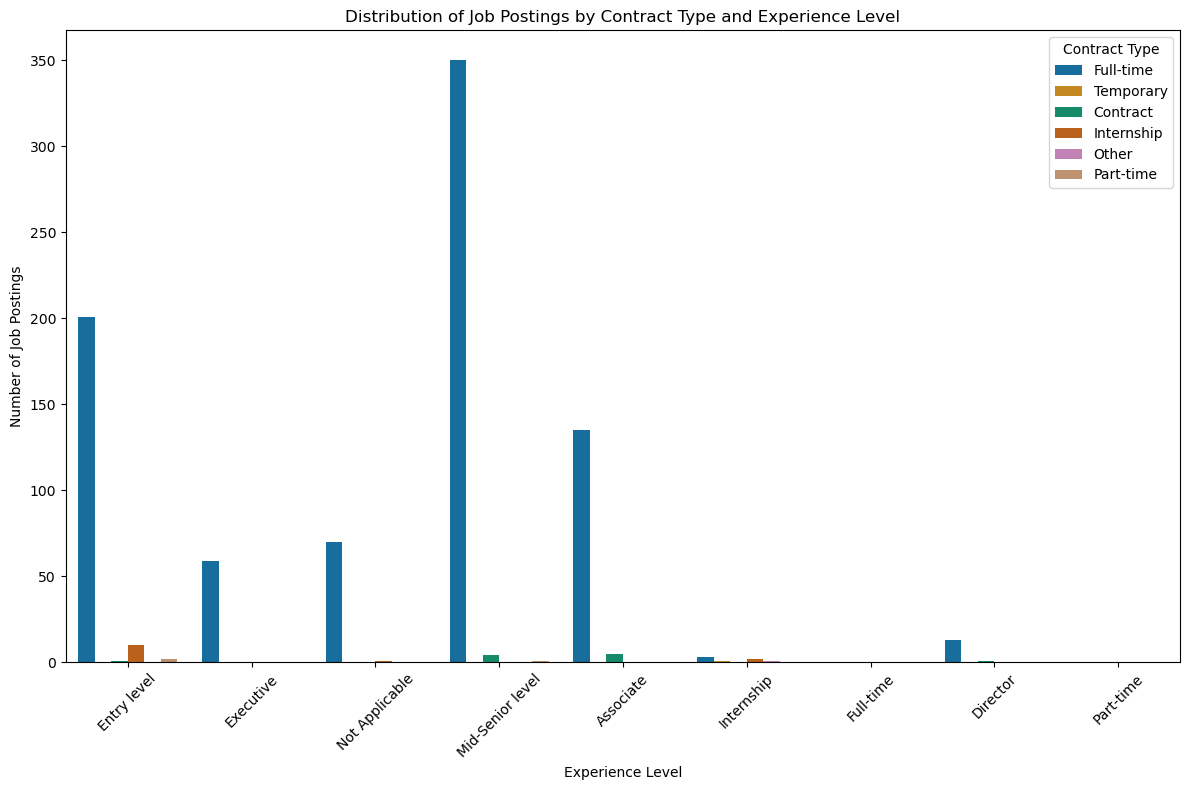

In [126]:
# Create a grouped bar chart to visualize the distribution of job postings by contract type and experience level
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='experienceLevel', hue='contractType', palette='colorblind')
plt.title('Distribution of Job Postings by Contract Type and Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Contract Type')
plt.tight_layout()
plt.show()

##### Insights
- **Most job postings are for full-time contracts**, across all experience levels.
- **Temporary and contract jobs are less common**, but they are more prevalent at entry-level and mid-senior level positions.
- **Internship positions are mostly available for entry-level candidates**.